# Project Name: Heart Failure Prediction with Machine Learning Algorithms 

The dataset to downloaded from the below link
https://www.kaggle.com/competitions/heaít-attack-íisk-analysis/data

# Methodology/Lifecycle of a Data Analytics Project
1. Define the Problem
2. Data Collection and Preparation
3. Exploration Data Analysis (EDA)
4. Feature Engineering/Feature Selection
5. Modeling
6. Interpretation
7. Deployment and Monitoring (next step)


# 1: Define the Problem

In [39]:
# Define the problem statement
print("\nProblem Statement:")
print("Given patient details, lifestyle factors, and medical aspects, the goal is to predict whether individuals are at high or low risk of experiencing heart attacks. This is a binary classification problem where the target variable, 'Heart Attack Risk', has two categories: 'Yes' for patients at risk and 'No' for those not at risk.")


Problem Statement:
Given patient details, lifestyle factors, and medical aspects, the goal is to predict whether individuals are at high or low risk of experiencing heart attacks. This is a binary classification problem where the target variable, 'Heart Attack Risk', has two categories: 'Yes' for patients at risk and 'No' for those not at risk.


In [86]:
## Main aim is to understand more about the data
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [41]:
sns.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (15, 10) # plot size

# 2: Data Collection and Preparation

In [42]:
dataset = pd.read_csv('heart_attack_prediction_dataset.csv')

print("Shape of Data Set: ", dataset.shape) 
# Display the shape of the dataset(row and columns).

Shape of Data Set:  (8763, 26)


In [43]:
# In data set toatal 8763 observations and 26 features

In [44]:

dataset.head(10)
## To print the top 10 records; by default it display only 5 entries.

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,1,0.625008,Unhealthy,1,1,2,7.798752,241339,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,1
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,1,4.098177,Healthy,0,0,7,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,1,3.427929,Average,0,1,4,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,0,16.868302,Average,0,0,5,11.348787,25086,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,0
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,1,0.194515,Unhealthy,0,0,4,4.055115,209703,22.558917,232,7,7,Japan,Asia,Northern Hemisphere,0


In [45]:
dataset.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [46]:
dataset.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

### FEATURE of DATA-TYPES:

In [48]:
def dataset_description(dataset):
    columns=dataset.columns.to_list()
    print('No.olumns in Dataframe: ',len(columns))
    print('\nColumn attribute names: ',columns)
    ncol=dataset.describe().columns.to_list()
    ccol=[]
    for i in columns:
        if(ncol.count(i)==0):
            ccol.append(i)
        else:
            continue
    print('\nNo. of Numerical column in dataFrame: ',len(ncol))
    print('\nNumerical column names: ',ncol)
    print('\nNo. of Categorical Column in DataFrame: ',len(ccol))
    print('\nCategorical column names: ',ccol)
    
dataset_description(dataset)

No.olumns in Dataframe:  26

Column attribute names:  ['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere', 'Heart Attack Risk']

No. of Numerical column in dataFrame:  19

Numerical column names:  ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk']

No. of Categorical Column in DataFrame:  7

Categorical column names:  ['Patient ID', 'Sex', 'Blood Pressure', 

In [49]:
# Continuous: Exercise Hours Per Week, BMI, Sedentary Hours Per Day
# Discrete/Numerical: Age, Cholesterol, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Previous Heart Problems, 
           #Medication Use, Stress Level, Income, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Heart Attack Risk 
# Object: patient_id, Sex, Blood Pressure, Diet, Country, Continent, Hemisphere

In [50]:
# Display the information about missing values
print(dataset.isnull().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


In [51]:
# The dataset is pristine, with no missing values, ensuring data integrity and completeness for confident analysis and modeling.
#This data is clean, complete, and ready for analysis without any missing values or errors.
## Let's assume missing values are represented as "NaN"
# So to make it simple, we'll fill missing numerical values with the mean and missing categorical values with the mode.

In [52]:
dataset.nunique() #Unique values found in the Dataset of each column.

Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2


In [53]:
dataset.describe().T #provides descriptive statistics of the dataset, transposed for easier reading.

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


In [120]:
#Statistical analysis was done by dataset. describe().T which provides descriptive statistics of the dataset, where “.T” transposed data for easier reading.
#The provided summary statistics offer insights into the distribution and characteristics of the dataset. Here are some insights based on the statistics:
#1. Age: The average age of patients in the dataset is approximately 54 years, with a wide range from 18 to 90 years.
#2. Cholesterol: The mean cholesterol level is around 260 mg/dL, with a standard deviation of approximately 81 mg/dL. Cholesterol levels range from 120 to 400 mg/dL.
#3. Heart Rate: The average heart rate is approximately 75 beats per minute (bpm), with values ranging from 40 to 110 bpm.
#4. Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Previous Heart Problems, Medication Use: These columns are binary indicators, with values indicating the presence (1) or absence (0) of the respective condition or behavior.
#5. Exercise Hours Per Week: On average, patients engage in physical activity for around 10 hours per week, with a standard deviation of approximately 5.78 hours.
#6. Stress Level: The average reported stress level is approximately 5.47 on a scale of 1 to 10.
#7. Sedentary Hours Per Day: Patients spend an average of nearly 6 hours per day in sedentary activities, with values ranging from around 3 to 12 hours.
#8. Income: The average income level of patients is approximately $158,263, with values ranging from $20,062 to $299,954.
#9. BMI (Body Mass Index): The mean BMI is approximately 28.89, indicating an overweight status on average, with values ranging from 18 to 40.
#10. Triglycerides: The average triglyceride level is approximately 418 mg/dL, with values ranging from 30 to 800 mg/dL.
#11. Physical Activity Days Per Week: On average, patients engage in physical activity on approximately 3 to 4 days per week.
#12. Sleep Hours Per Day: Patients typically sleep for around 7 hours per day, with values ranging from
#4 to 10 hours.
#13. Heart Attack Risk: Approximately 36% of patients in the dataset are classified as being at risk of a heart attack, based on the provided data.
#These insights provide a general understanding of the distribution and characteristics of the dataset, which can guide further analysis and modeling efforts.

In [54]:
dataset['Heart Attack Risk'].value_counts()
# Presence of heart attack risk (1: Yes, 0: No)

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

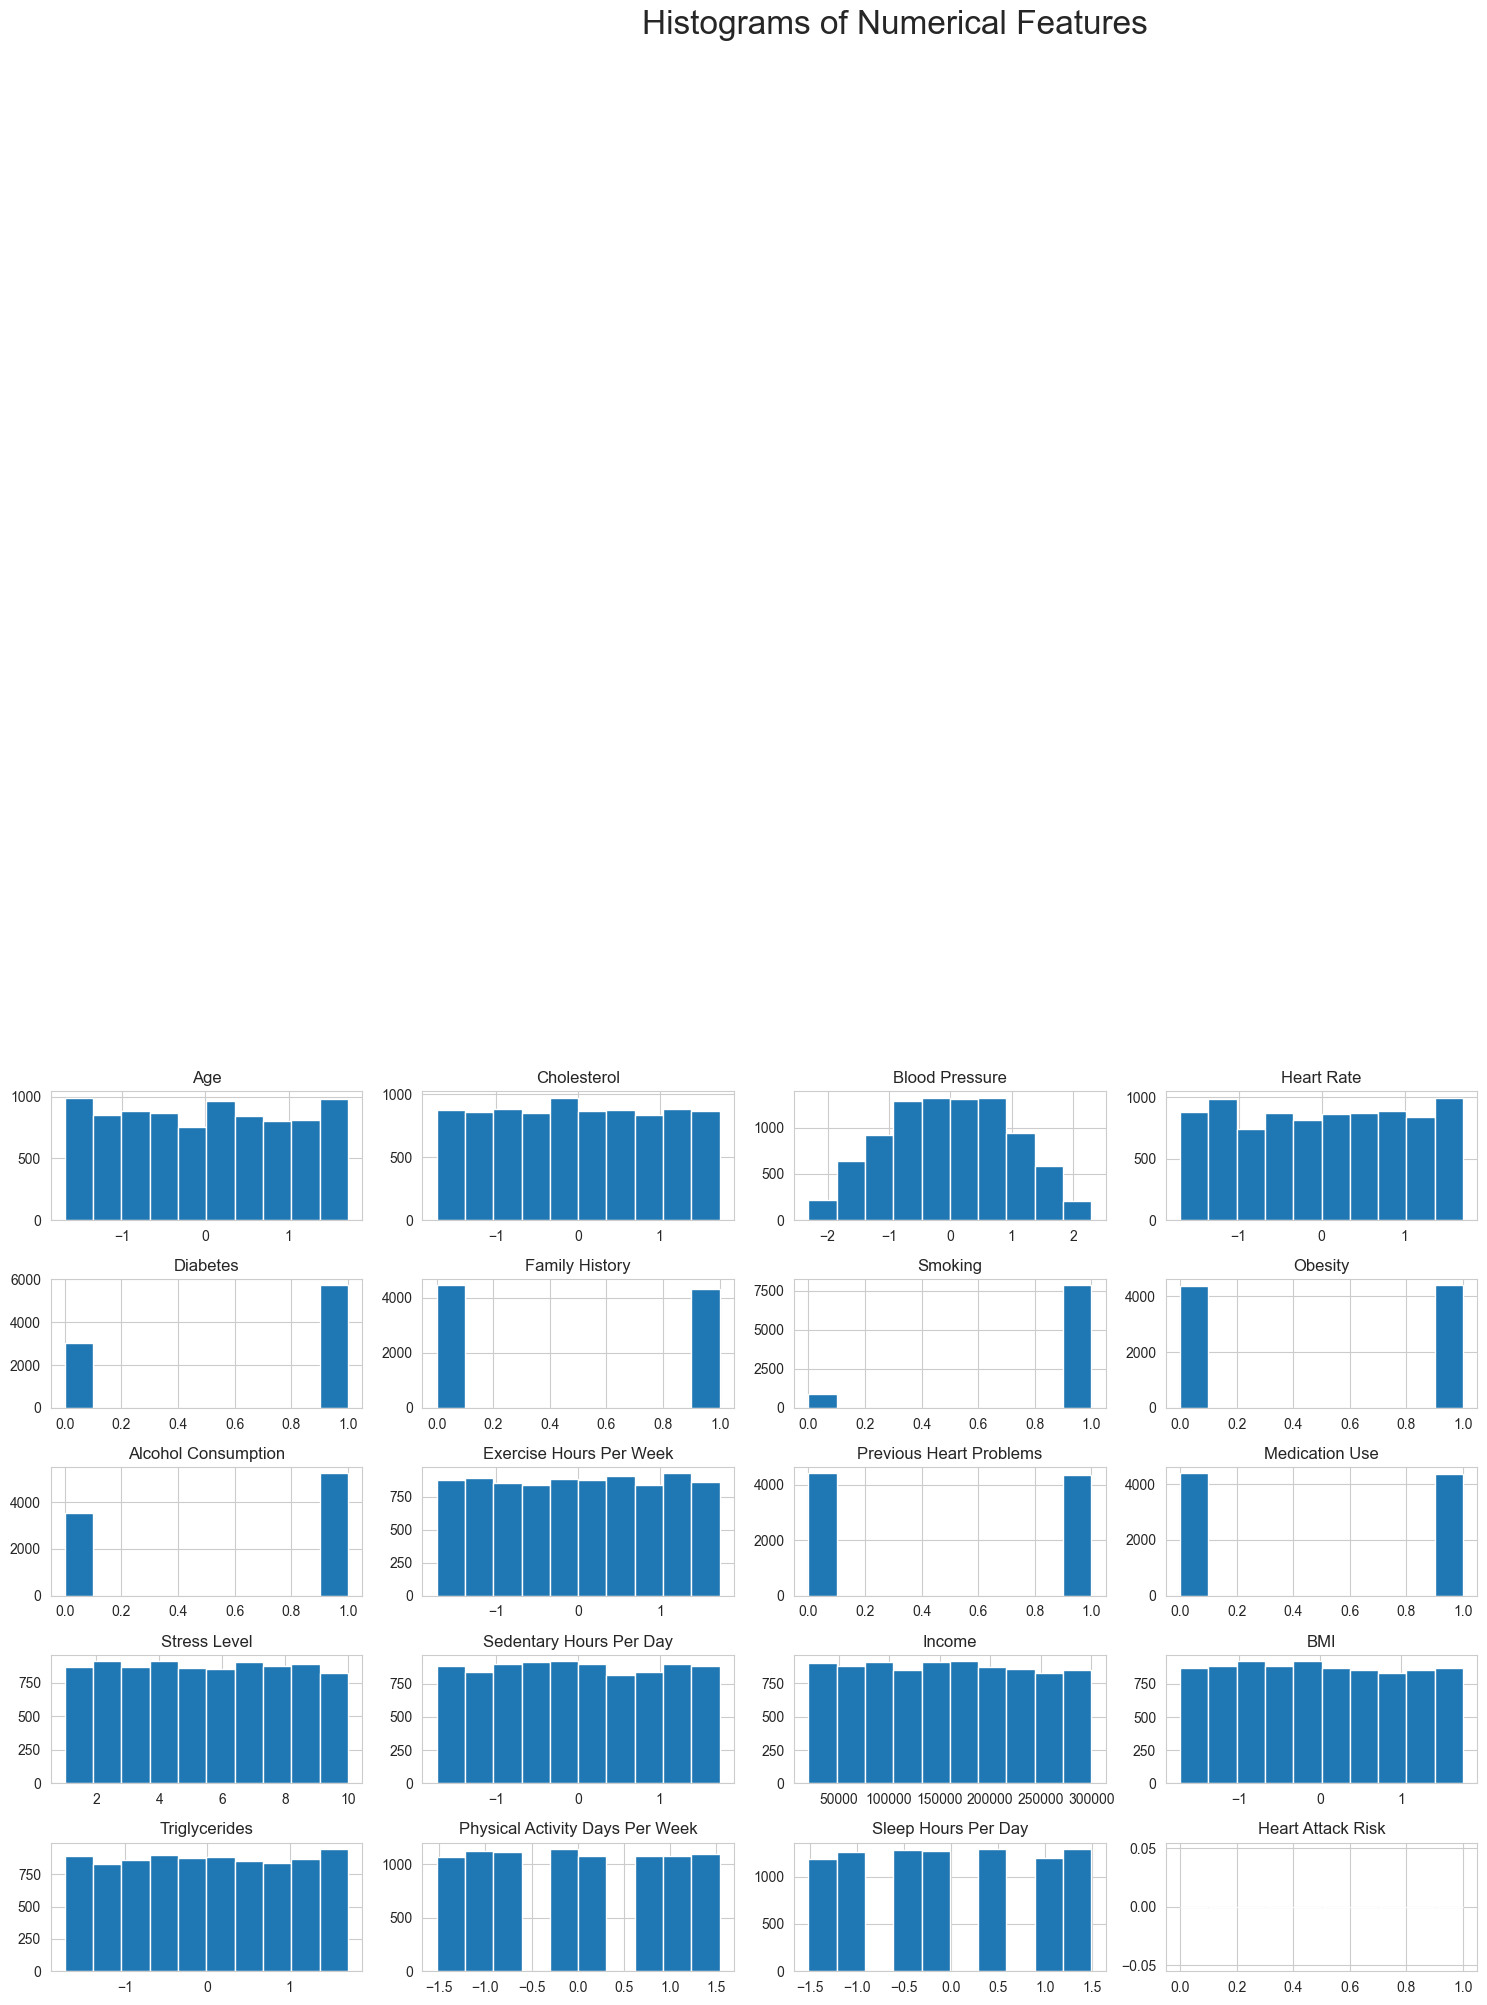

In [118]:
# Data visualization: Histograms
plt.figure(figsize=(12, 6))
dataset.hist()
plt.suptitle('Histograms of Numerical Features', x=0.6, y=2, fontsize=24)
plt.tight_layout()
plt.show()

# 4: Feature Engineering/Feature Selection

In [70]:
#Feature engineering is pivotal in machine learning, optimizing model performance by transforming raw data into informative features. 
#It involves converting non-numeric data, creating new features to capture complex relationships, and handling missing or noisy data. #
#Ultimately, it enhances model accuracy, interpretability, and generalization.

In [107]:
#As we know we have some non-numeric data, sshown below:
#so to  convert string/object columns to numerical/float columns, we need to handle categorical variables appropriately. 
#I will perfform thesse opertion:

#1:One-hot encoding categorical variables
#2:Feature scaling to ensure all features have the same scale
#3:Handling skewness or outliers in numerical features
#4:Feature selection: to identify the most relevant features for modeling
#5 # Convert target variable to binary (0 for 'No' and 1 for 'Yes') It is alreday converted in dataaaet.


In [104]:
# Convert target variable to binary (0 for 'No' and 1 for 'Yes')
dataset['Heart Attack Risk'] = dataset['Heart Attack Risk'].map({'No': 0, 'Yes': 1})


In [105]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   float64
 2   Cholesterol                      8763 non-null   float64
 3   Blood Pressure                   8763 non-null   float64
 4   Heart Rate                       8763 non-null   float64
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

In [106]:
# Perform one-hot encoding for categorical variables
#categorical_cols = ['Sex', 'Diet', 'Country', 'Continent', 'Hemisphere']
#dataset = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True)

In [109]:
# Save the cleaned dataset
#dataset.to_csv("cleaned_heart_attack_risk.csv", index=False)




####Giving ome error ###I wil sollve it llaater